Vamos reforçar o que aprendemos na aula com os exercicios nesse notebook. Usaremos um dataset de videos do youtube para fazermos algumas analises.

In [27]:
import pandas
df = pandas.read_csv("https://databootcamp.nyc3.digitaloceanspaces.com/USvideos.csv")

### Qual a quantidade de linhas e colunas do dataframe?



In [28]:
linhas, colunas = df.shape
print(linha)
print(colunas)

40949
16


### Faça um novo dataframe removendo as colunas `video_id`, `thumbnail_link` e `video_error_or_removed`



In [23]:
# axis = 1 coluna
# axis = 0 linha

df.drop(["video_id", "thumbnail_link", "video_error_or_removed"], axis=1)


,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,"One year after the presidential election, John..."
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,False,Today we find out if Link is a Nickelback amat...
4,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,False,False,NaN
40946,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,False,False,I had so much fun transforming Safiyas hair in...
40947,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,False,False,How Black Panther Should Have EndedWatch More ...


### Filtre os vídeos com menos de 10000 likes e pegue as seguintes métricas:
- Quantos videos se encaixam nesse filtro?
- Média de dislikes
- Mediana de visualizações
- Vídeo com mais views
- Vídeo com menos dislikes



In [30]:
mensagem = """
Quantos videos se encaixam nesse filtro: {}
Média de dislikes {}
Mediana de visualizações {}
Vídeo com mais views {}
Vídeo com menos dislikes {}
"""
mensagem = mensagem.format(
    df[df.likes < 10000].video_id.count(),
    df[df.likes < 10000].dislikes.mean(),
    df[df.likes < 10000].views.median(),
    pandas.unique(df[df.views.values == df[df.likes.values < 10000].views.values.max()].title),
    pandas.unique(df[df.dislikes.values == df[df.likes.values < 10000].dislikes.values.min()].title.values)
)

print(mensagem)


Quantos videos se encaixam nesse filtro: 14771
Média de dislikes 513.3076298151784
Mediana de visualizações 165635.0
Vídeo com mais views ['To Our Daughter']
Vídeo com menos dislikes ['Improvising in the style of different classical composers | Practice Notes 34'
 'The Oak Beams of New College, Oxford'
 'Huffy Metaloid Bicycle Commercial 1997'
 'Sphaera - demonstrating interaction' 'Apple Clips sample'
 "dapulse is now monday.com. And there's a good reason why."
 "John Collins' Best Dunks So Far This Season"
 'WWSB Channel 7:   Sarasota Police stepping up pedestrian and bicyclist safety enforcement'
 'Vostok Brompton Beach Ride' '#StarOnFox Exclusive Clip for TheYBF.com'
 'Religion Of Sports Season 2 - Trailer 1' 'Flying the Textron Scorpion'
 'mad eye moody - moving eyeball prop'
 'BALL SURPRISE PRANK (woody and kleiny)'
 'The greatest best man speech from 10 year old son.'
 "Breaking Bad's Bryan Cranston on Meeting Charles Manson"
 'Highlights of the EA predatory behavior announceme

### Agora filtre os vídeos com mais de 600 mil vizualizações e não são da categoria 1 e 25
- Quantos videos se encaixam nesse filtro?
- Média de dislikes
- Mediana de visualizações
- Vídeo com mais views
- Vídeo com menos dislikes



In [80]:
mensagem = """
Quantos videos se encaixam nesse filtro? {}
Média de dislikes {}
Mediana de visualizações {}
Vídeo com mais views {}
Vídeo com menos dislikes {}
"""
mensagem = mensagem.format(
    df[(df.views > 600000) & (df.category_id != 1) & (df.category_id != 25)].video_id.count(),
    df[(df.views > 600000) & (df.category_id != 1) & (df.category_id != 25)].dislikes.mean(),
    df[(df.views > 600000) & (df.category_id != 1) & (df.category_id != 25)].views.median(),
    df[df.views == df[(df.views > 600000) & (df.category_id != 1) & (df.category_id != 25)].views.max()].title.values,
    df[df.dislikes == df[(df.views > 600000) & (df.category_id != 1) & (df.category_id != 25)].dislikes.max()].title.values
)

print(mensagem)


Quantos videos se encaixam nesse filtro? 19567
Média de dislikes 6939.23370981755
Mediana de visualizações 1682177.0
Vídeo com mais views ['Childish Gambino - This Is America (Official Video)']
Vídeo com menos dislikes ['So Sorry.']



### Qual dia da semana com mais videos publicados?



In [34]:
df['days_of_week'] =  pandas.to_datetime(df['publish_time']).dt.day_name()

df.groupby('days_of_week')['video_id'].count().head(1)



days_of_week
Friday    7002
Name: video_id, dtype: int64

### Qual a distribuição (histograma) de videos x views?



In [111]:
%matplotlib inline

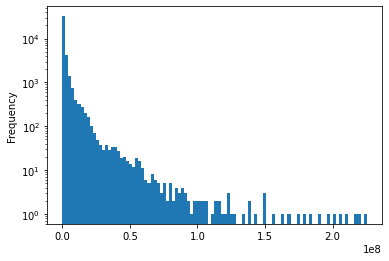

In [40]:

df['views'].plot.hist(bins = 100, log = True)



### Qual a distribuição de videos x likes?



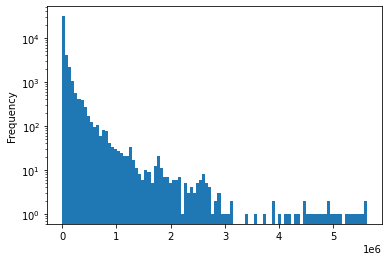

In [41]:
df['likes'].plot.hist(bins = 100, log = True)

### Faça uma sobreposição entre os histogramas de views e likes



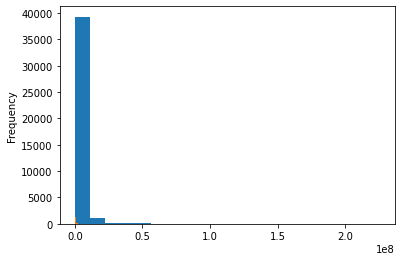

In [32]:
df.views.plot.hist(bins=20)
df.likes.plot.hist(bins=20)

### Faça um gráfico torta (`pie`) que divide os vídeos em "Contém titulo capitalizado (primeira letra maiuscula)" vs "Não contém titulo capitalizado"



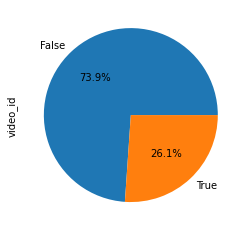

In [43]:
letra = []
for x in df.title:
    letra.append(x.istitle())
    
df['contains_capitalized'] = letra
df.groupby('contains_capitalized')['video_id'].count().plot.pie(autopct='%0.1f%%')

### Qual a porcentagem de vídeos com título capitalizado e não-capitalizado?

Crie uma coluna "contains_capitalized" do tipo bool, onde o valor é True se o titulo da linha for capitalized e False se não for.

In [35]:
df.groupby('contains_capitalized')['video_id'].count()/df.groupby('contains_capitalized')['video_id'].count().sum() *100

contains_capitalized
False    73.913893
True     26.086107
Name: video_id, dtype: float64

### Quantas datas únicas e canais únicos temos nas colunas "trending_date" e "channel_title" respectivamente



In [80]:
print(len(df.trending_date.unique()))
print(len(df.channel_title.unique()))

205
2207


### Faça um boxplot dos likes vs categoria



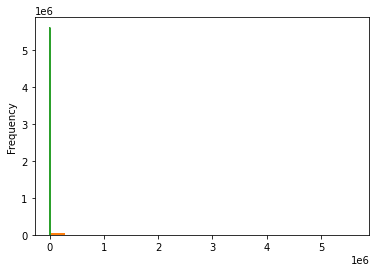

### Qual a distribuição (histograma) de vídeos publicados por dia da semana?



In [8]:
import matplotlib.pyplot as plt

plt.plot(df.title, df.days_of_week)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'days_of_week'

### Qual a distribuição(histograma) de vídeos publicados por hora do dia?



### Quais correlações você consegue encontrar nesse dataset? Quais insights você tira com esses dados?
Esse exercicio é pra trabalhar sua criatividade e capacidade analítica, não existe resposta certa